In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read file
df = pd.read_csv('supermarket_sales.csv')

# Display the first few rows of the dataframe
df.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


### Which branch has the highest sales revenue? 
Branch B with $48,094

Branch
A    11645.346667
B    48094.780000
C    30250.630000
Name: gross income, dtype: float64


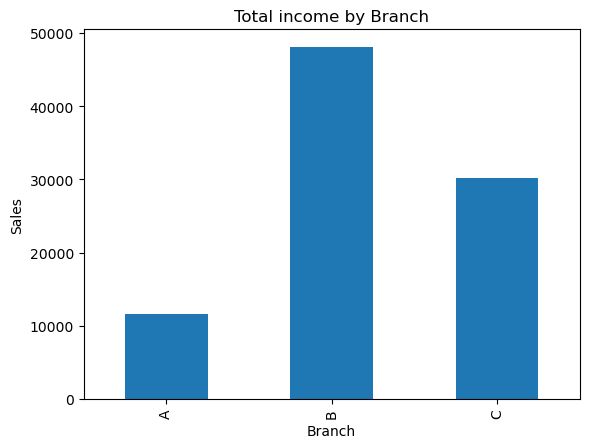

In [2]:
# Group the data by the 'branch' column and calculate the sum of the 'gross income' column for each group
income_by_branch = df.groupby('Branch')['gross income'].sum()
# Display the results
print(income_by_branch)
income_by_branch.plot(kind='bar')
plt.title('Total income by Branch')
plt.xlabel('Branch')
plt.ylabel('Sales')
plt.show()

### Which branch has the highest sales volume?

Branch B with 2307 sales

Branch
A    1750
B    2307
C    1989
Name: Quantity, dtype: int64


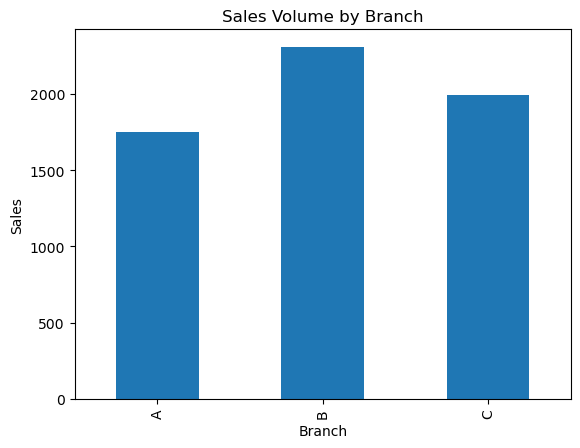

In [3]:
# Group the data by the 'branch' column and calculate the sum of the 'Quantity' column for each group
volume_by_branch = df.groupby('Branch')['Quantity'].sum()
# Display the results
print(volume_by_branch)
volume_by_branch.plot(kind='bar')
plt.title('Sales Volume by Branch')
plt.xlabel('Branch')
plt.ylabel('Sales')
plt.show()

## Which payment methods is most popular amongst customers?

EWallet with 338 sales

Ewallet was used in 338 sales
Cash was used  in 334 sales
Credit cards were used in 307 sales


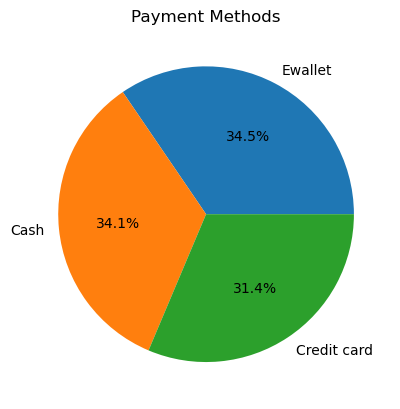

In [4]:
count_eWallet = df['Payment'].str.contains('Ewallet', case=False).sum()
print("Ewallet was used in {} sales".format(count_eWallet))

count_cash = df['Payment'].str.contains('Cash', case=False).sum()
print("Cash was used  in {} sales".format(count_cash))

count_card = df['Payment'].str.contains('Credit card', case=False).sum()
print("Credit cards were used in {} sales".format(count_card))


# Count the number of occurrences of each word in the column
word_counts = df['Payment'].value_counts()

# Create a pie chart of the percentage of each word that appears in the column
plt.pie(word_counts.values, labels=word_counts.index, autopct='%1.1f%%')
plt.title('Payment Methods')
plt.show()

### Are there any spending patterns based on the payment method used?

- Health and beauty is the most popular product line
- for Sports and travel, Cash is more frequently used
- People prefer to use Ewallet for Home and lifestyle accessories
- Credit card is by far the least popular payment method for electronic accessories

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Payment                                                                         
Ewallet                           34                   67                  33   
Cash                              35                   61                  27   
Credit card                       16                   61                  32   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Payment                                                                 
Ewallet                      95                  41                 63  
Cash                         90                  31                 80  
Credit card                  99                  27                 64  


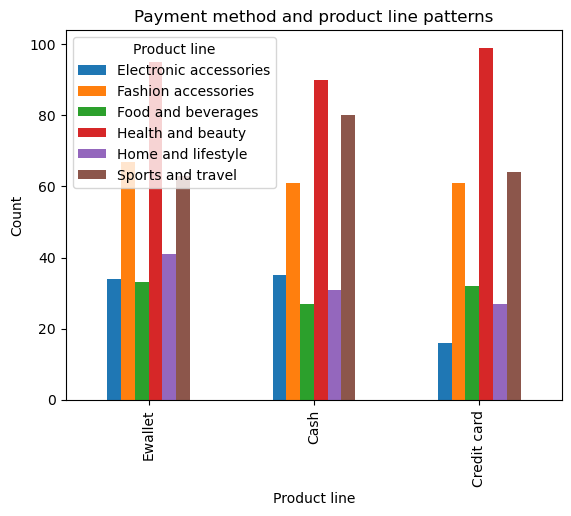

In [14]:
# Group the DataFrame by Payment and Product line, and count the number of occurrences
counts = df.groupby(['Payment', 'Product line']).size().unstack(fill_value=0)

# Calculate the total count for each payment, and sort by descending order
totals = counts.sum(axis=1)
sorted_counts = counts.loc[totals.sort_values(ascending=False).index]
print(sorted_counts)

# Plot a grouped bar chart
sorted_counts.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Product line')
plt.ylabel('Count')
plt.title('Payment method and product line patterns')

# Show the plot
plt.show()